# Inside AirBnB

## Enunciado

Este Notebook consiste en la actividad evaluable correspondiente al Módulo 1 de la Asignatura de Aprendizaje Automático I del Máster en Ingeniería y Ciencia de Datos de la UNED.

La actividad constituye en un ejercicio de clasificación empleando los tres métodos descritos en el tema y la aplicación de varias de las técnicas estudiadas en el Tema 2.

### 1. Datos

Los datos provienen de la web InsideAirBnB, dedicada al estudio de los alquileres vacacionales ofrecidos en la plataforma AirBnB. El fichero está contenido dentro de la carpeta datasets/insideAirBnB. Este fichero es una versión editada, a fin de facilitar la tarea, del listado original de información sobre las ofertas existentes, para la ciudad de Madrid, en abril de 2017. 

> Contiene 13321 registros con 11 campos cada uno, correspondientes a diferentes características de cada oferta de alojamiento.

La tarea de clasificación consistirá en clasificar los datos según el tipo de alojamiento, definido en el campo room_type, a partir del resto de características. Es decir, en room_type estarán codificadas las clases y en el resto de campos los atributos.

### 2. Estudio estadístico y limpieza de datos

Se realizará un breve estudio estadístico de los datos numéricos y de la variable `room_type` se contarán los valores de cada clase. Si las clases no estuvieran balanceadas habrá que usar los mecanismos que puedan tener los algoritmos de clasificación para tratar con este caso. Para Naive Bayes ya se habla de esto en la actividades autoevaluables, para los otros métodos consultar en la documentación de sus APIs los parámetros de los constructores para ver si hay mecanismos para balancear.
En cuanto a la limpieza de datos estudiar si hay datos faltantes, transformar datos categóricos y escalar datos numéricos haciendo uso de pipelines cuando sea posible.

### 3. Entrenamiento y validación

1. Dividir los datos en conjunto de entrenamiento y test de manera que el conjunto de test sea un 20 % del total.
2. Evaluar los modelos midiendo la exactitud (accuracy) usando validación cruzada para los tres métodos estudiados utilizando los parámetros por defecto de los tres métodos, salvo lo comentado para el balance, para cross_val_score usar cv=10. Comparar los resultados de los tres modelos.
3. Realizar la afinación de hiperparámetros para KNN y Árboles de decisión empleando Grid- SearchCV, Naive Bayes no tiene hiperparámetros que afinar.
    1. Para KNN buscando el valor óptimo de K.
    2. Para Árboles de decisión: variando max_leaf_nodes entre 2 y 50 ambos inclusive , min_samples_split entre 2 y 6 ambos inclusive y max_depth entre 1 y 20 ambos in- clusive. Ver la documentación de la API.

### 4. Valoración

Se valorará la creación del código que realice los requisitos enumerados, la presencia de comentarios de lo que hace el código y sus resultados y las comparaciones entre los resultados obtenidos por los distintos algoritmos, así como algún gráfico que muestre los resultados. Para terminar incluir un apartado de conclusiones. Tanto los comentarios como las conclusiones no es necesario que sea extensos, sino que describan de forma concisa.

## Realización del ejercicio

Antes de empezar a "ensuciarnos las manos", vamos a importar todos los paquetes necesarios, de los que iremos haciendo uso a lo largo del ejercicio:

# Objetivo:
Crear un modelo, que dado unos datos prediga el room_type al que pertence.

In [1]:
! pwd

/Users/adzarei/Documents/UNED/ING_CIENC_DATOS/projects/AAI/TP1


In [2]:
import os
import pandas as pd
import numpy as np
import operator
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import confusion_matrix

### Recogida de datos

En primer lugar, vamos a cargar los datos con los que vamos a trabajar. Estos datos están ubicados en la carpeta "input-data", en un fichero llamado "airbnb.csv". Para ello, usaremos el método `read_csv()` de pandas.

In [3]:
data_path = os.path.join("..","datasets","insideAirBnB","airbnb.csv")
airbnb = pd.read_csv(data_path)

In [4]:
airbnb.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Centro,Justicia,40.424715,-3.698638,Entire home/apt,49,28,35,0.42,1,99
1,Centro,Embajadores,40.413418,-3.706838,Entire home/apt,80,5,18,0.30,1,188
2,Moncloa - Aravaca,Argüelles,40.424920,-3.713446,Entire home/apt,40,2,21,0.25,9,195
3,Moncloa - Aravaca,Casa de Campo,40.431027,-3.724586,Entire home/apt,55,2,3,0.13,9,334
4,Latina,Cármenes,40.403410,-3.740842,Private room,16,2,23,0.76,2,250


In [5]:
airbnb[airbnb["neighbourhood_group"] == "Centro"].head(15)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Centro,Justicia,40.424715,-3.698638,Entire home/apt,49,28,35,0.42,1,99
1,Centro,Embajadores,40.413418,-3.706838,Entire home/apt,80,5,18,0.30,1,188
6,Centro,Universidad,40.422022,-3.703954,Entire home/apt,60,3,1,0.03,1,283
7,Centro,Justicia,40.420153,-3.696498,Entire home/apt,100,4,31,0.43,1,232
12,Centro,Sol,40.415525,-3.703459,Entire home/apt,57,2,118,1.43,3,324
13,Centro,Embajadores,40.409259,-3.705049,Private room,20,6,3,0.05,1,311
19,Centro,Embajadores,40.408207,-3.702462,Private room,147,1,0,0.00,1,365
20,Centro,Justicia,40.419778,-3.697299,Entire home/apt,66,3,68,0.84,1,314
21,Centro,Universidad,40.420961,-3.704280,Entire home/apt,85,1,24,0.31,3,94
24,Centro,Embajadores,40.411907,-3.702294,Entire home/apt,50,2,170,2.30,9,334


In [6]:
print(airbnb['room_type'].unique())

['Entire home/apt' 'Private room' 'Shared room']


# Visualización

In [7]:
airbnb.groupby("room_type").size()

room_type
Entire home/apt    7926
Private room       5203
Shared room         192
dtype: int64

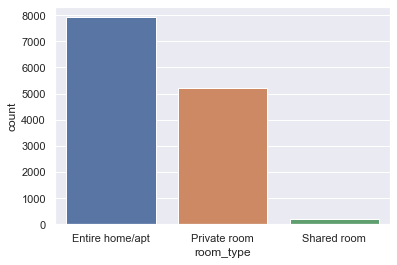

In [8]:
sns.countplot(airbnb["room_type"], label="room_type count")

Los datos no están balanceados, se tendrá que tener en cuenta a la hora de usar los algoritmos de clasificación.

In [9]:
num_airbnb = airbnb.drop(columns=["neighbourhood_group","neighbourhood","room_type"], axis=1, inplace=False)

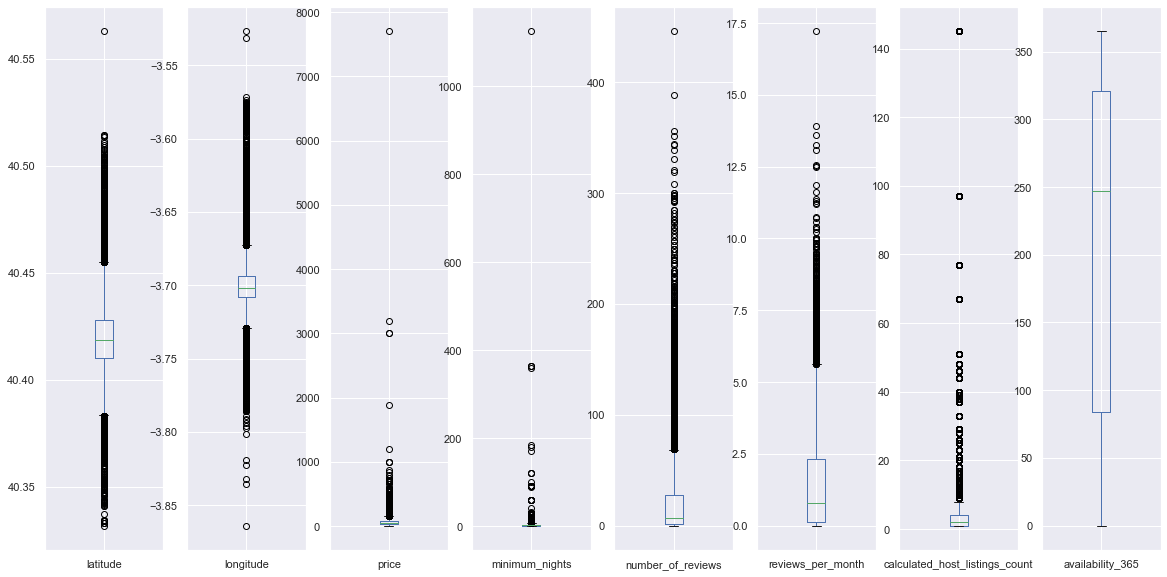

In [10]:
num_airbnb.plot(kind="box", subplots=True, sharex=False, sharey=False,figsize=(20,10))
plt.show()

Analizando el box and whiskers hay muchos outliers. Vamos a analizar la distribución para ver si nos conviene quitarlos.

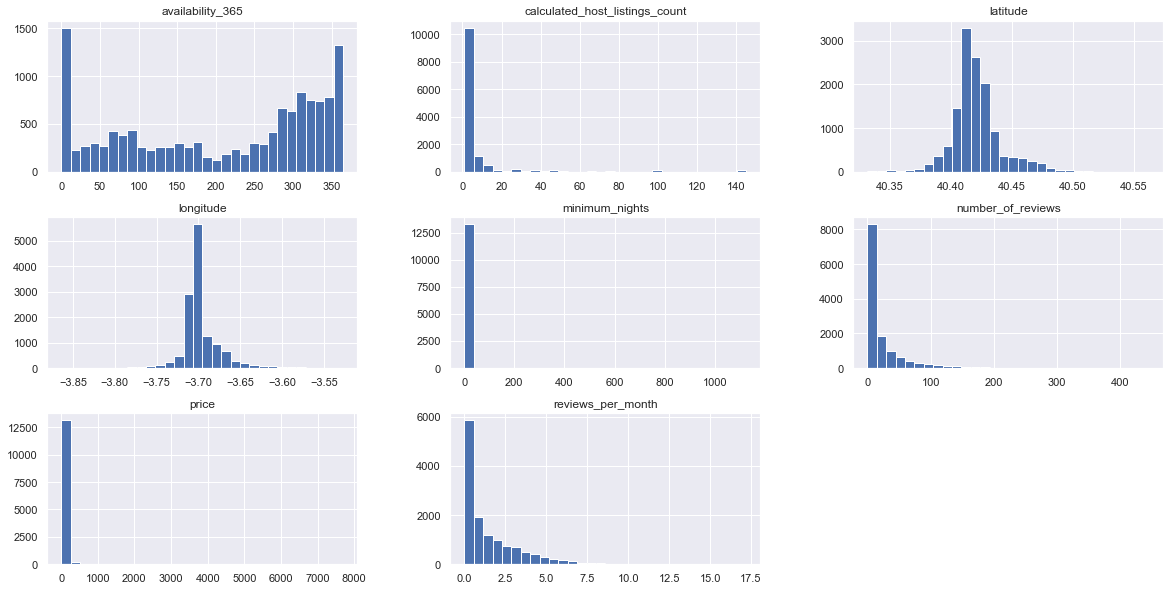

In [11]:
num_airbnb.hist(bins=30,figsize=(20,10))
plt.show()

In [12]:
num_airbnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000
mean,40.420730,-3.697268,69.171834,3.010885,22.986037,1.520329,7.605885,205.867202
std,0.020344,0.023832,103.721126,12.835619,38.406006,1.852367,19.619972,126.968961
min,40.331888,-3.863907,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.410090,-3.707856,31.000000,1.000000,1.000000,0.110000,1.000000,84.000000
50%,40.418731,-3.701602,53.000000,2.000000,7.000000,0.780000,2.000000,247.000000
75%,40.427997,-3.693818,80.000000,3.000000,28.000000,2.320000,4.000000,321.000000
max,40.562736,-3.526821,7700.000000,1125.000000,446.000000,17.210000,145.000000,365.000000


availability_365: OK <br/>
calculated_host_listings_count: Vamos a estudiar la ditribución por room_type para analizar si podemos descartar los valores altos.<br/>
latitud: OK <br/>
longitud: OK <br/>
minimum_nights: Vamos a estudiar la distribución por room_type para analizar si podemos descartar los valores altos. <br/>
number_of_reviews: Vamos a estudiar la distribución por room_type para analizar si podemos descartar los valores altos.<br/>
price: Vamos a estudiar la distribución por room_type para analizar si podemos descartar los valores altos.<br/>
reviews_per_month: Vamos a estudiar la distribución por room_type para analizar si podemos descartar los valores altos.<br/>

In [13]:
def hist_by_room_type(data, focus):
    data[data["room_type"] == "Entire home/apt"][focus].hist(bins=30, figsize=(30,10))
    data[data["room_type"] == "Private room"][focus].hist(bins=30, figsize=(30,10))
    data[data["room_type"] == "Shared room"][focus].hist(bins=30, figsize=(30,10))
    plt.title(focus)
    plt.show()

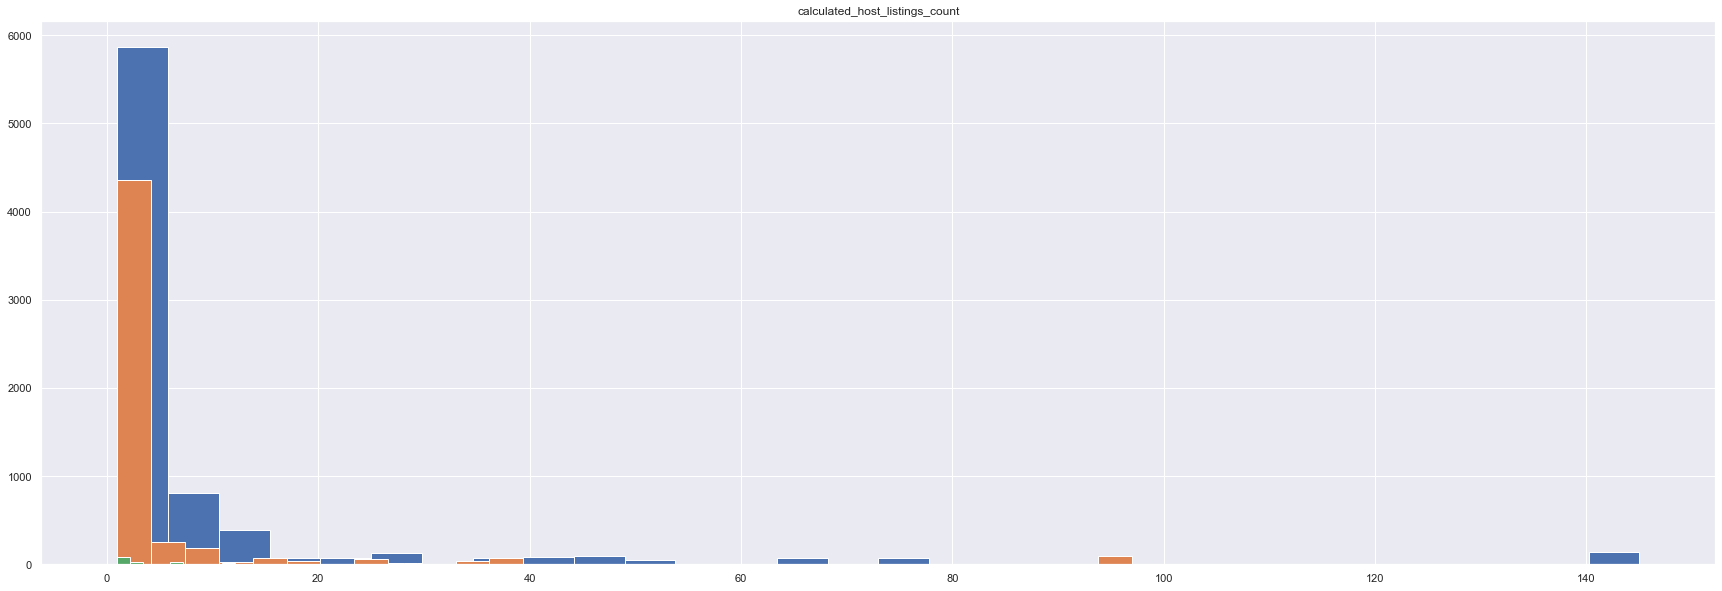

In [14]:
hist_by_room_type(airbnb,"calculated_host_listings_count")

Vamos a descartar los valores > 60 puesto que son pocos y los podemos considerar como outliers. Al descartar estos valores ayudamos, indirectamente a balancear "shared room".

In [15]:
airbnb_cleaned = airbnb[airbnb["calculated_host_listings_count"] < 60]

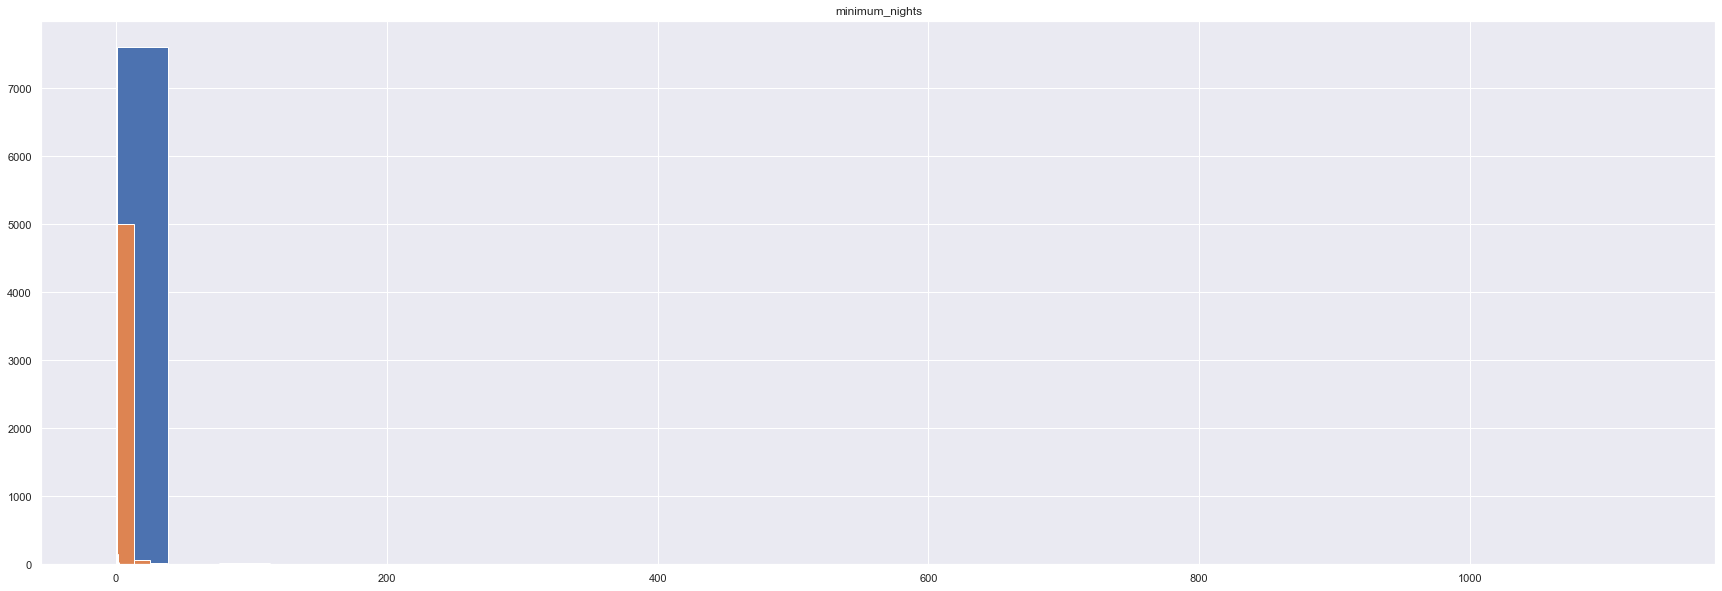

In [16]:
hist_by_room_type(airbnb_cleaned,"minimum_nights")

Vamos a descartar los valores > 100 puesto que son pocos y los podemos considerar como outliers. Al descartar estos valores ayudamos, indirectamente a balancear "shared room".

In [17]:
airbnb_cleaned = airbnb_cleaned[airbnb_cleaned["minimum_nights"] < 20]

Vamos a descartar los valores > 20 puesto que son pocos y los podemos considerar como outliers. Al descartar estos valores ayudamos, indirectamente a balancear "shared room". Otra alternativa que analizaremos mas adelante es categorizar la variable.

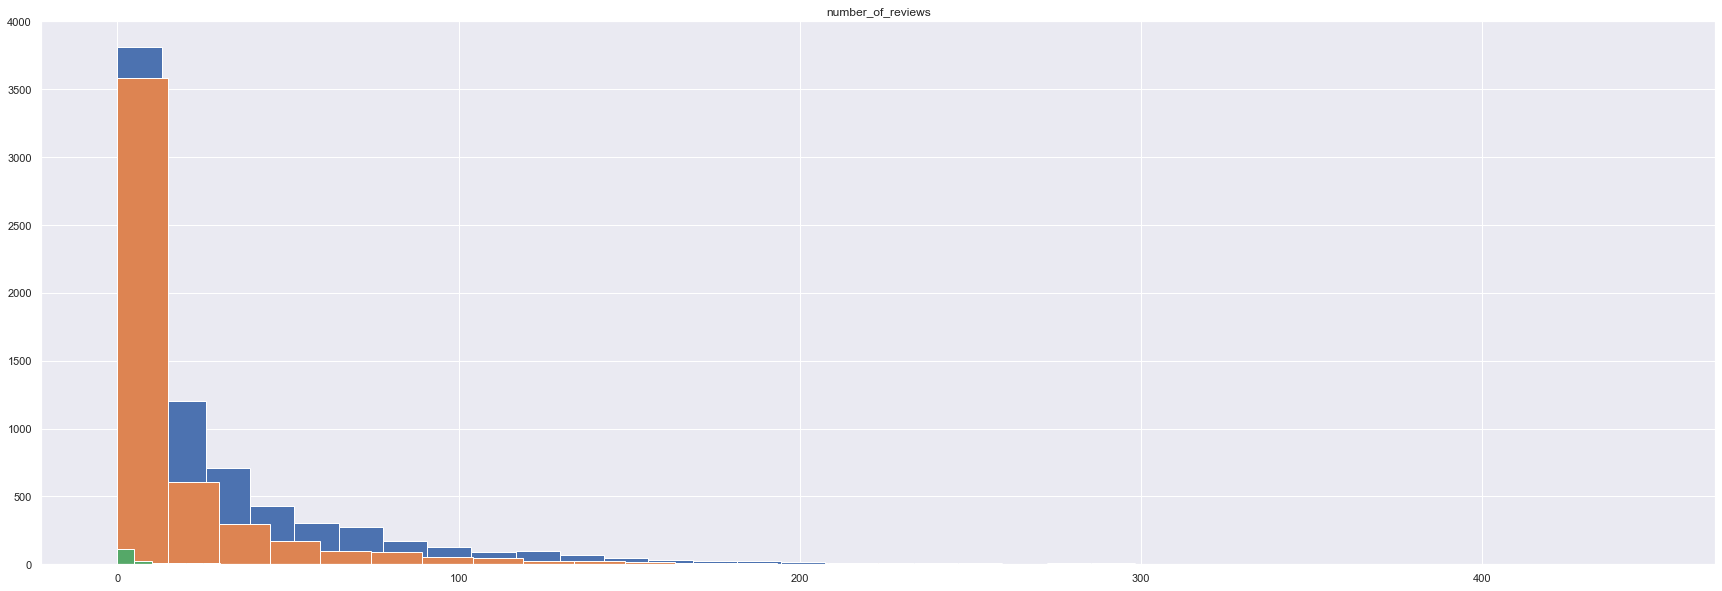

In [18]:
hist_by_room_type(airbnb_cleaned,"number_of_reviews")

Vamos a descartar los valores > 200 puesto que son pocos y los podemos considerar como outliers. Al descartar estos valores ayudamos, indirectamente a balancear "shared room". Otra alternativa que analizaremos mas adelante es categorizar la variable.

In [19]:
airbnb_cleaned = airbnb_cleaned[airbnb_cleaned["number_of_reviews"] < 200]

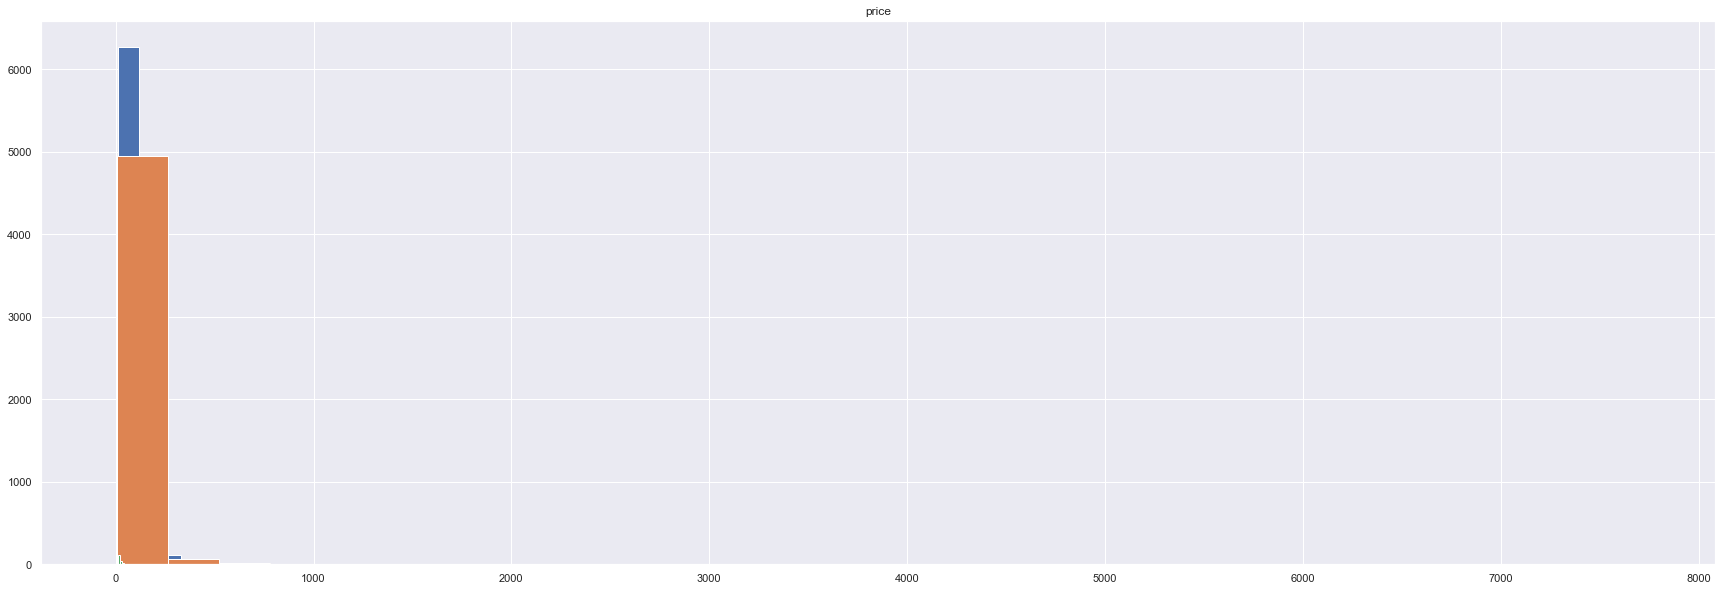

In [20]:
hist_by_room_type(airbnb_cleaned,"price")

Vamos a descartar los valores > 450 puesto que son pocos y los podemos considerar como outliers. Al descartar estos valores ayudamos, indirectamente a balancear "shared room".

In [21]:
airbnb_cleaned = airbnb_cleaned[airbnb_cleaned["price"] < 450]

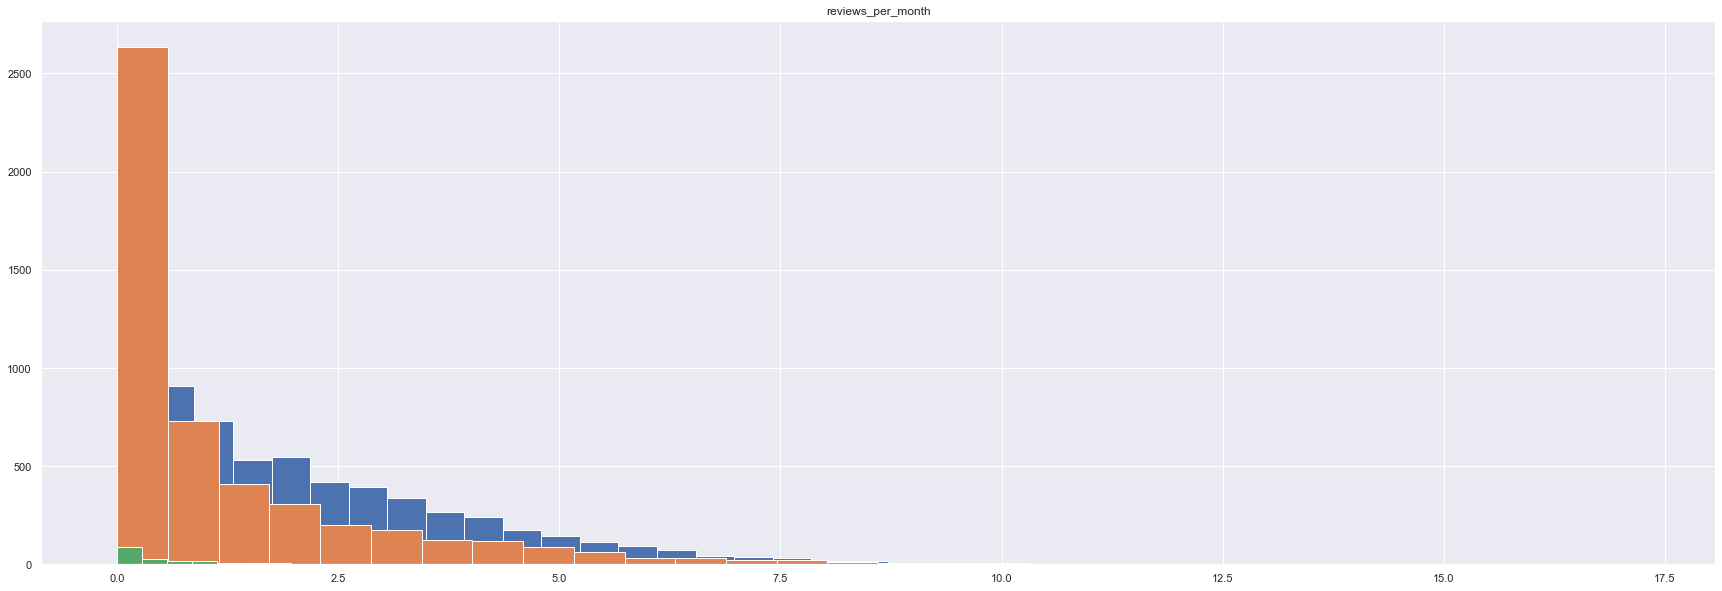

In [22]:
hist_by_room_type(airbnb_cleaned,"reviews_per_month")

Vamos a descartar los valores > 10 puesto que son pocos y los podemos considerar como outliers. Al descartar estos valores ayudamos, indirectamente a balancear "shared room". Otra alternativa que analizaremos mas adelante es categorizar la variable.

In [23]:
airbnb_cleaned = airbnb_cleaned[airbnb_cleaned["reviews_per_month"] < 10]

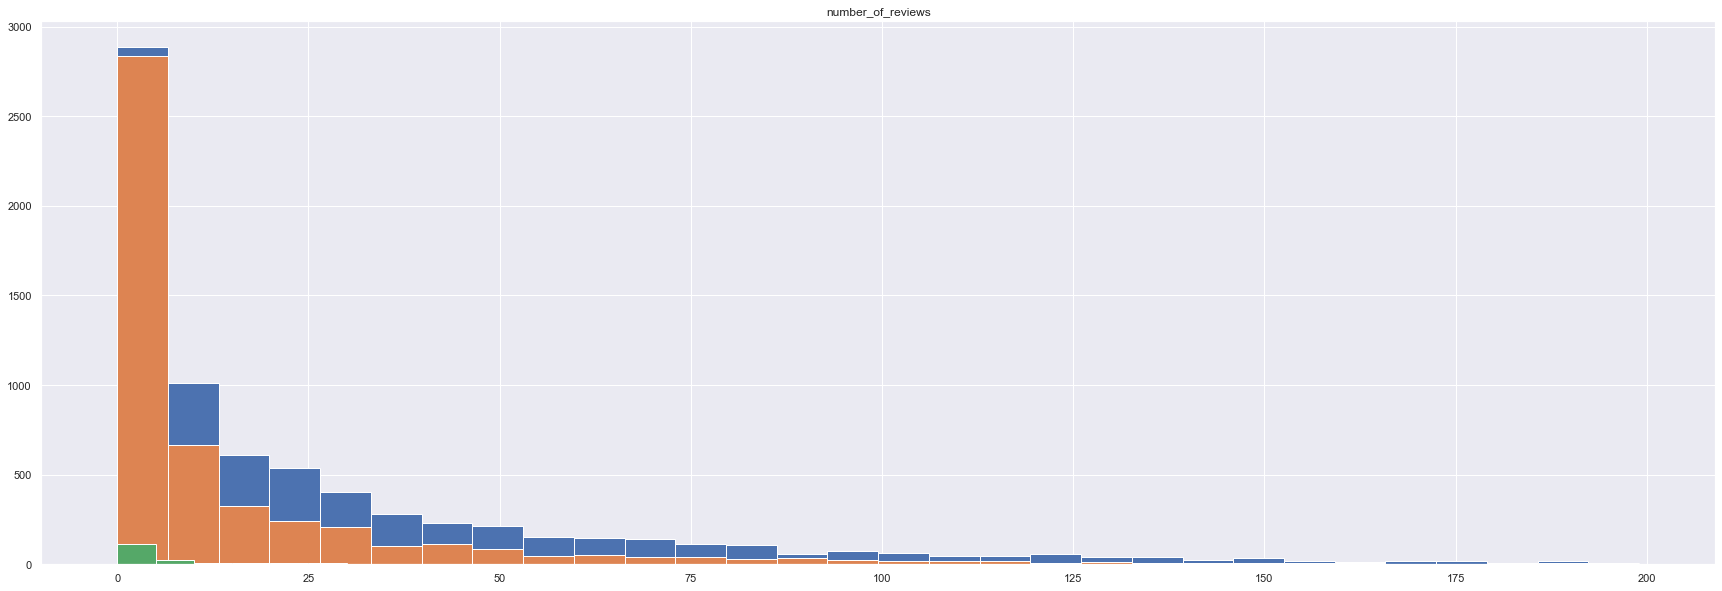

In [24]:
hist_by_room_type(airbnb_cleaned,"number_of_reviews")

Vamos a descartar los valores > 160 puesto que son pocos y los podemos considerar como outliers. Al descartar estos valores ayudamos, indirectamente a balancear "shared room". Otra alternativa que analizaremos mas adelante es categorizar la variable.

In [25]:
airbnb_cleaned = airbnb_cleaned[airbnb_cleaned["number_of_reviews"] < 160]

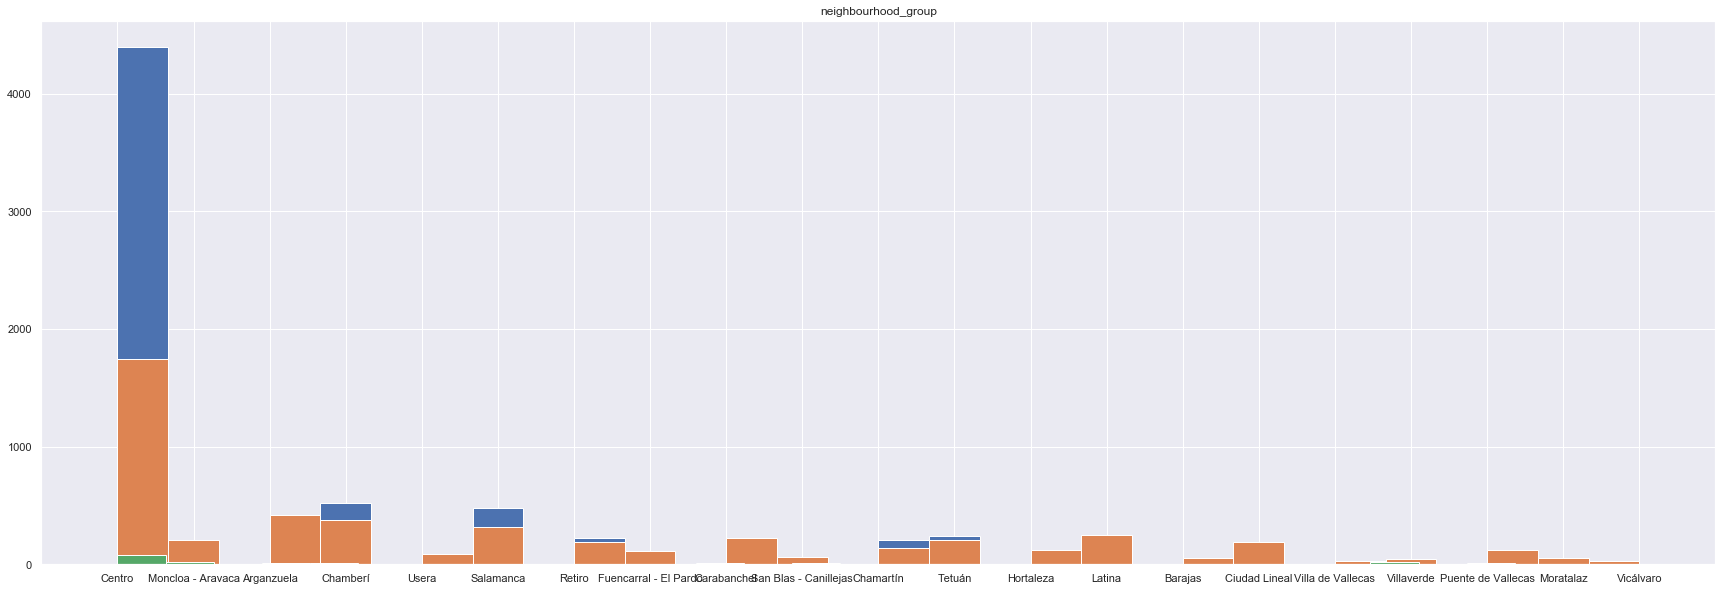

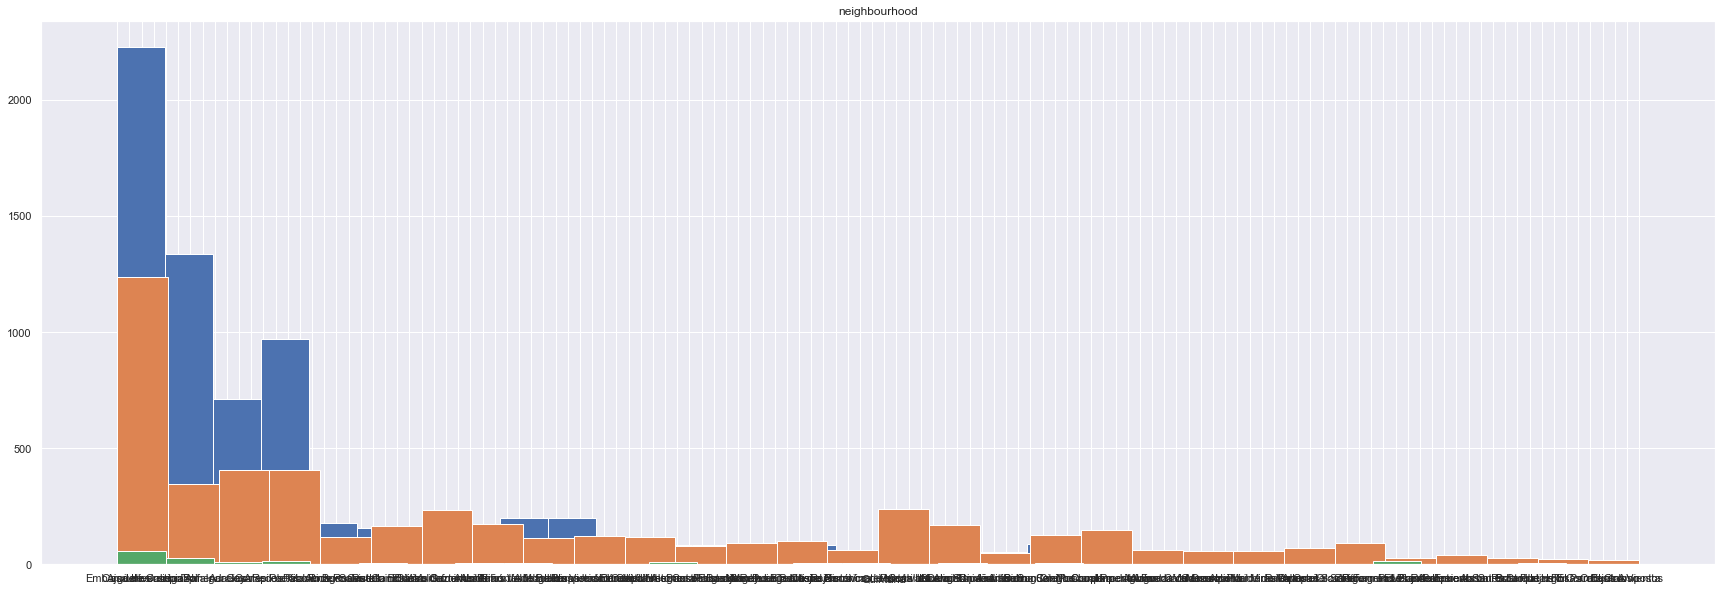

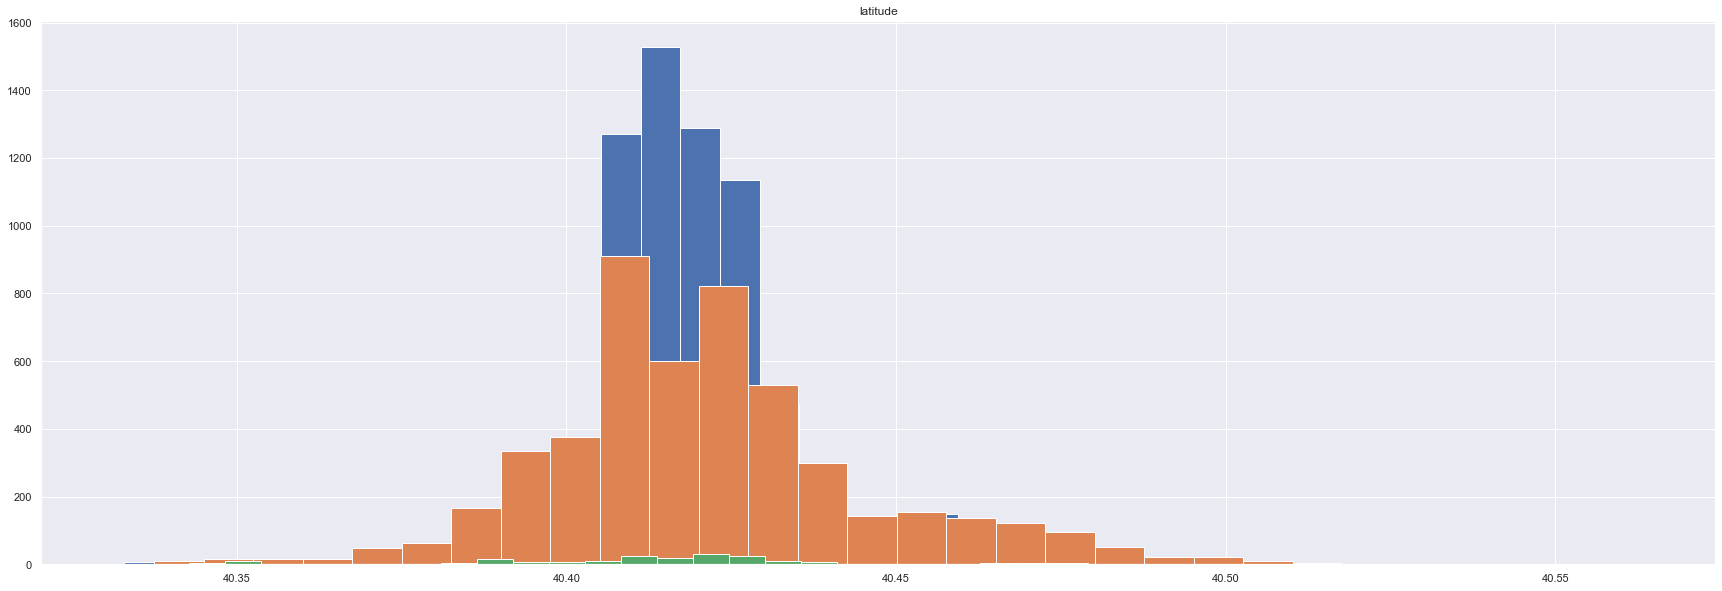

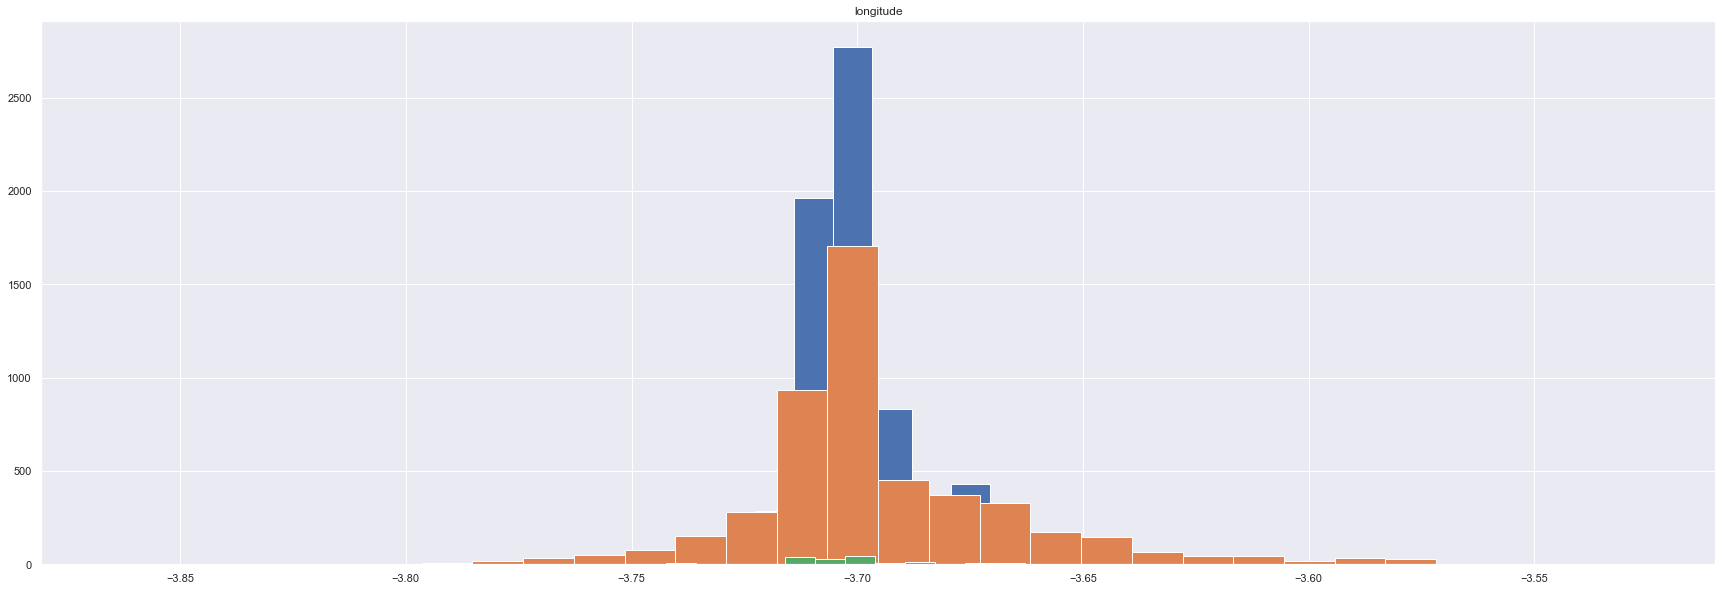

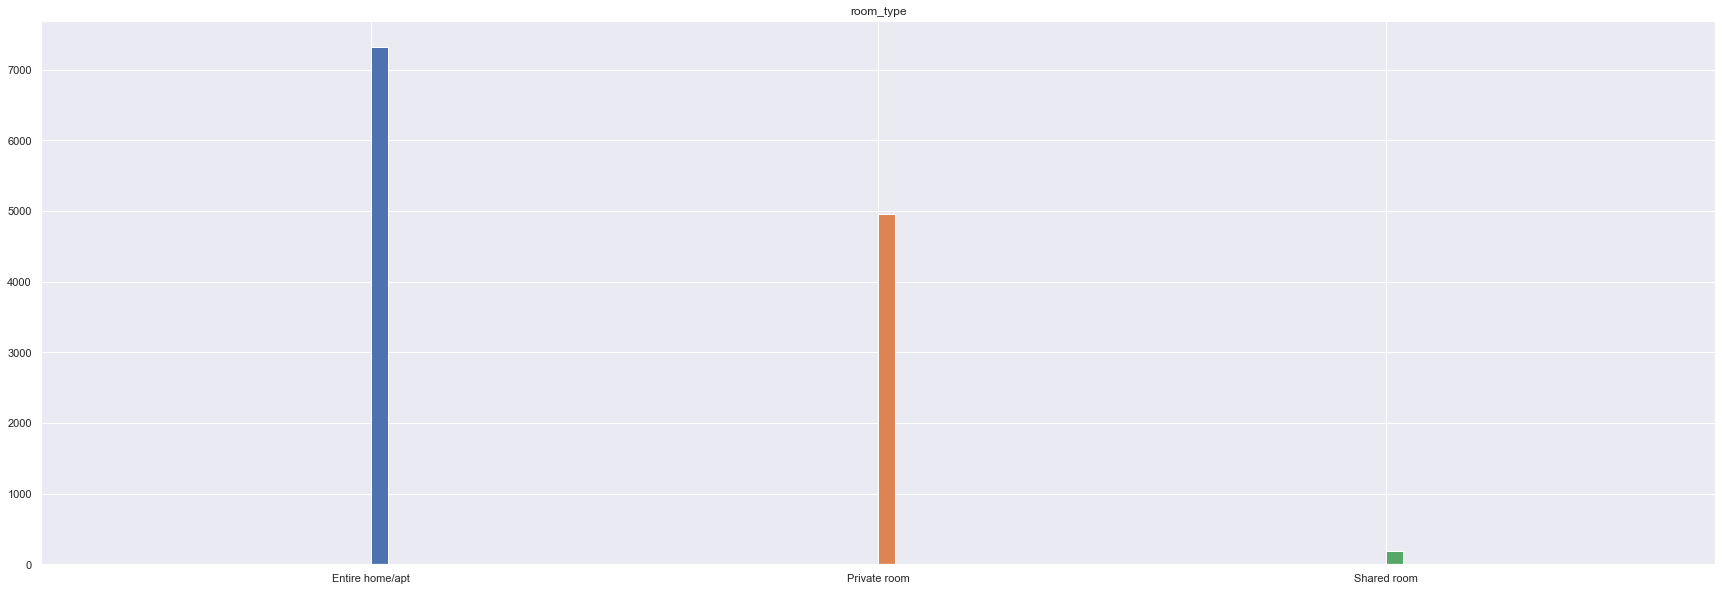

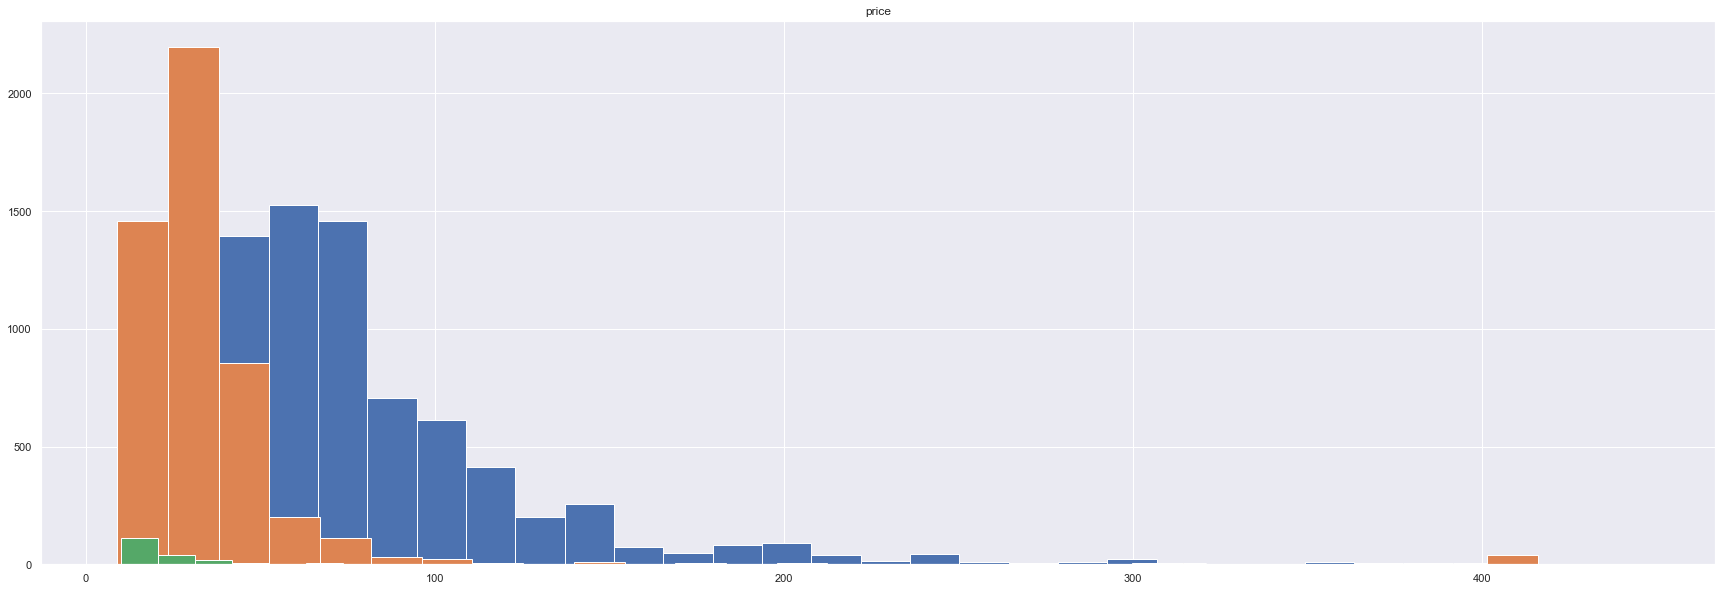

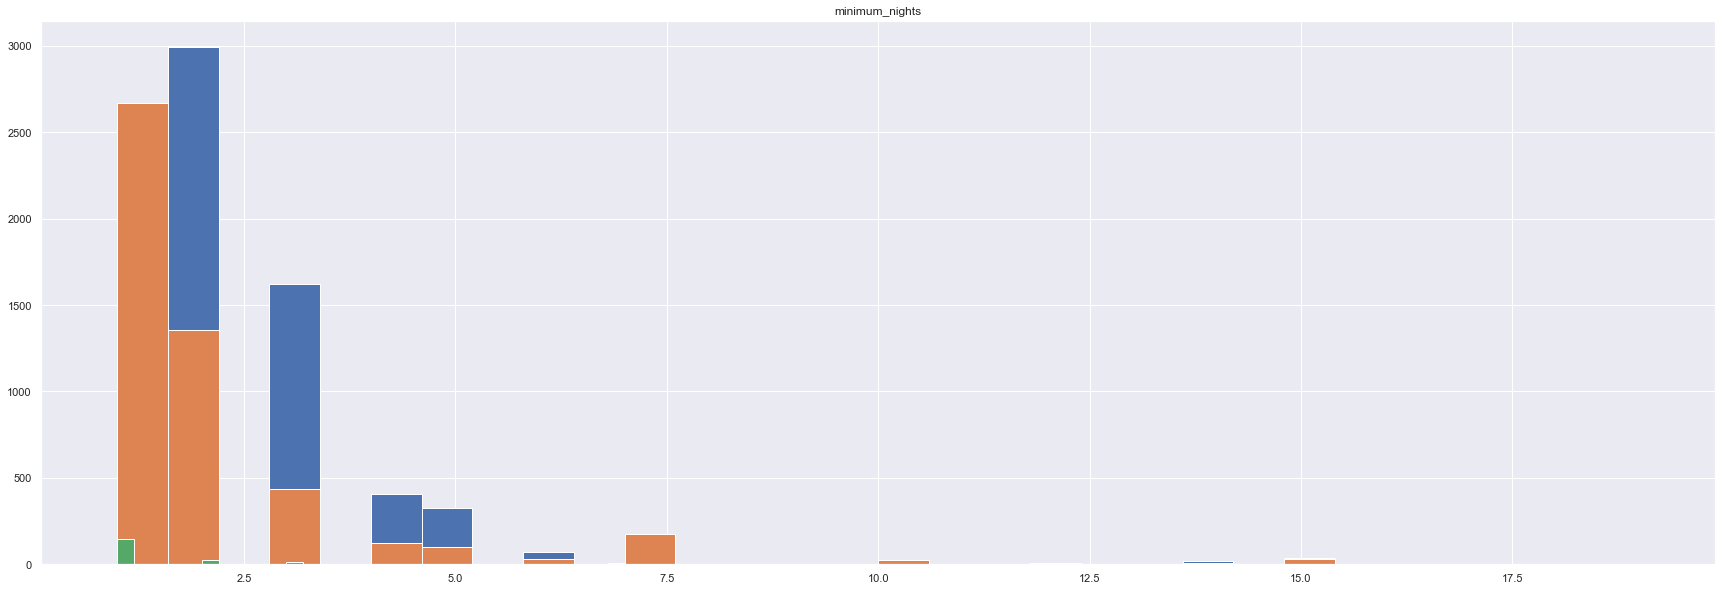

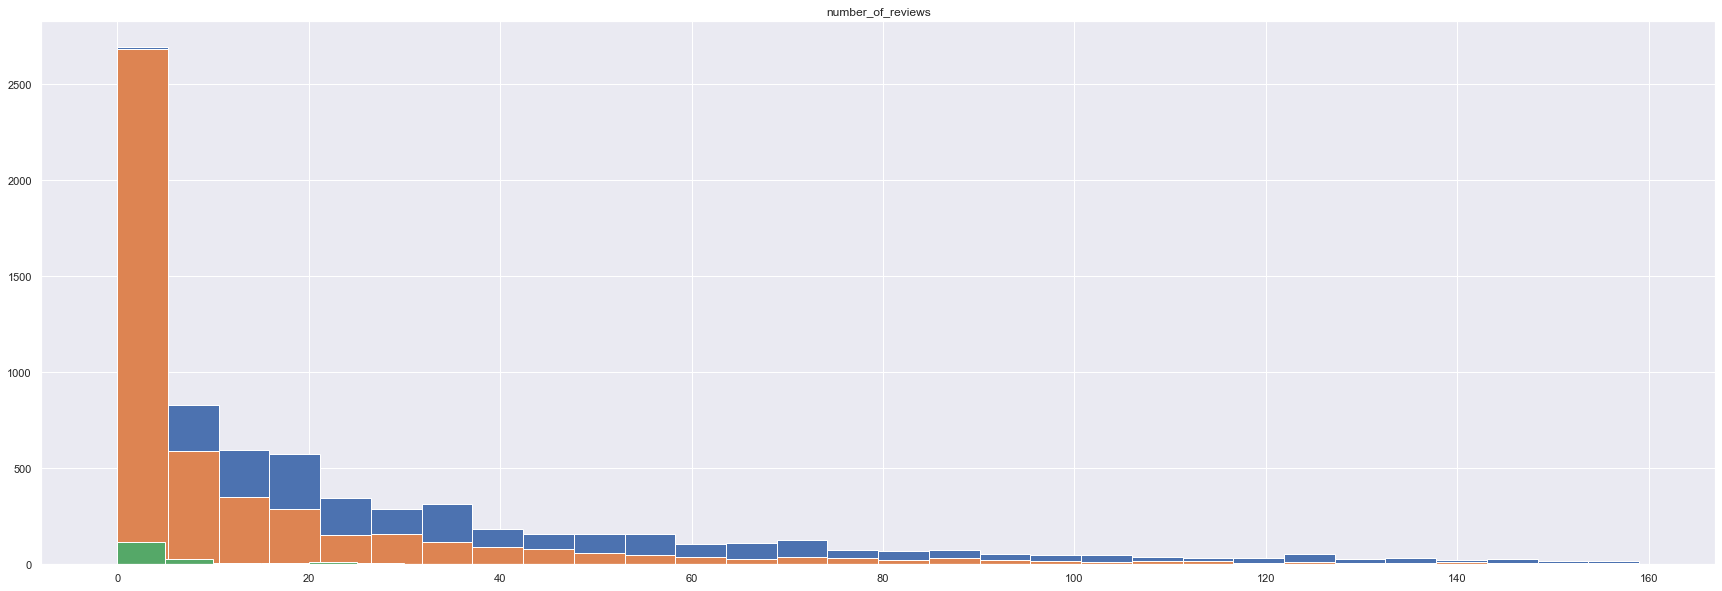

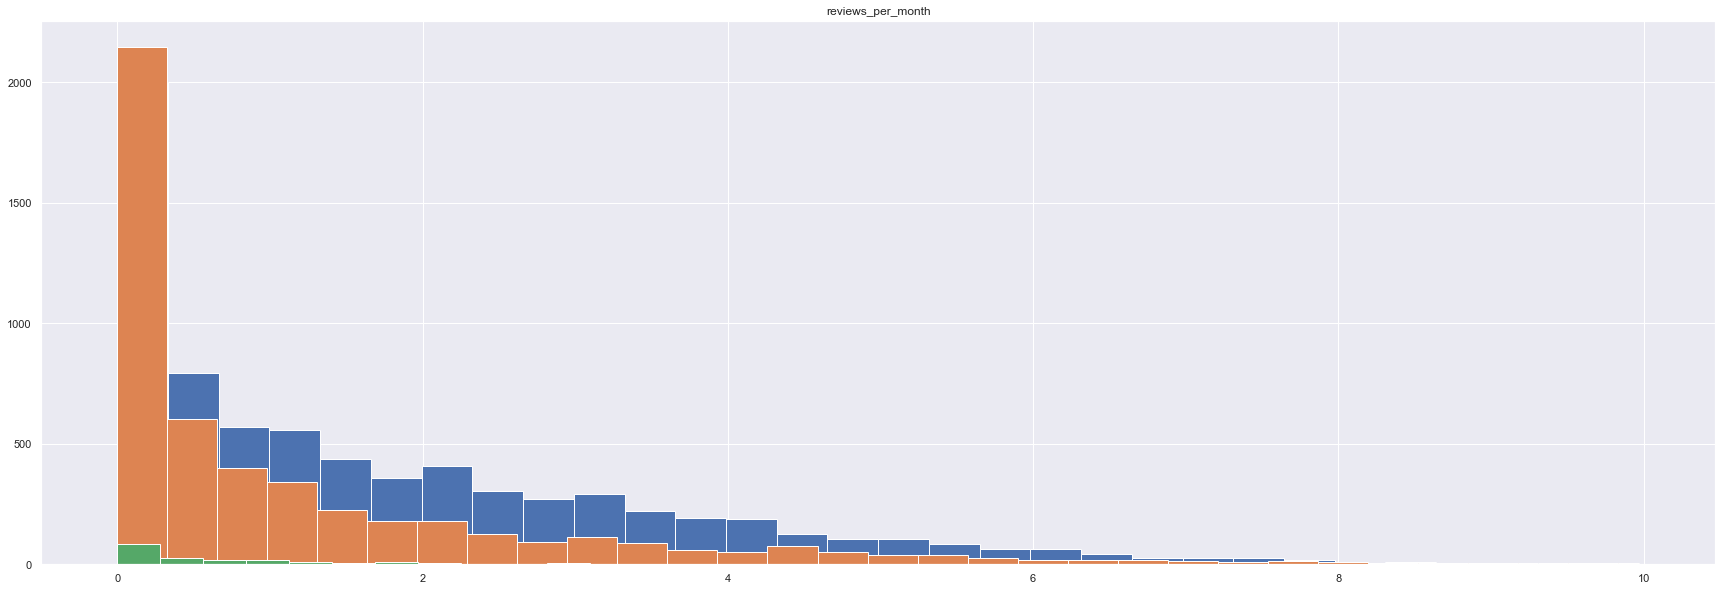

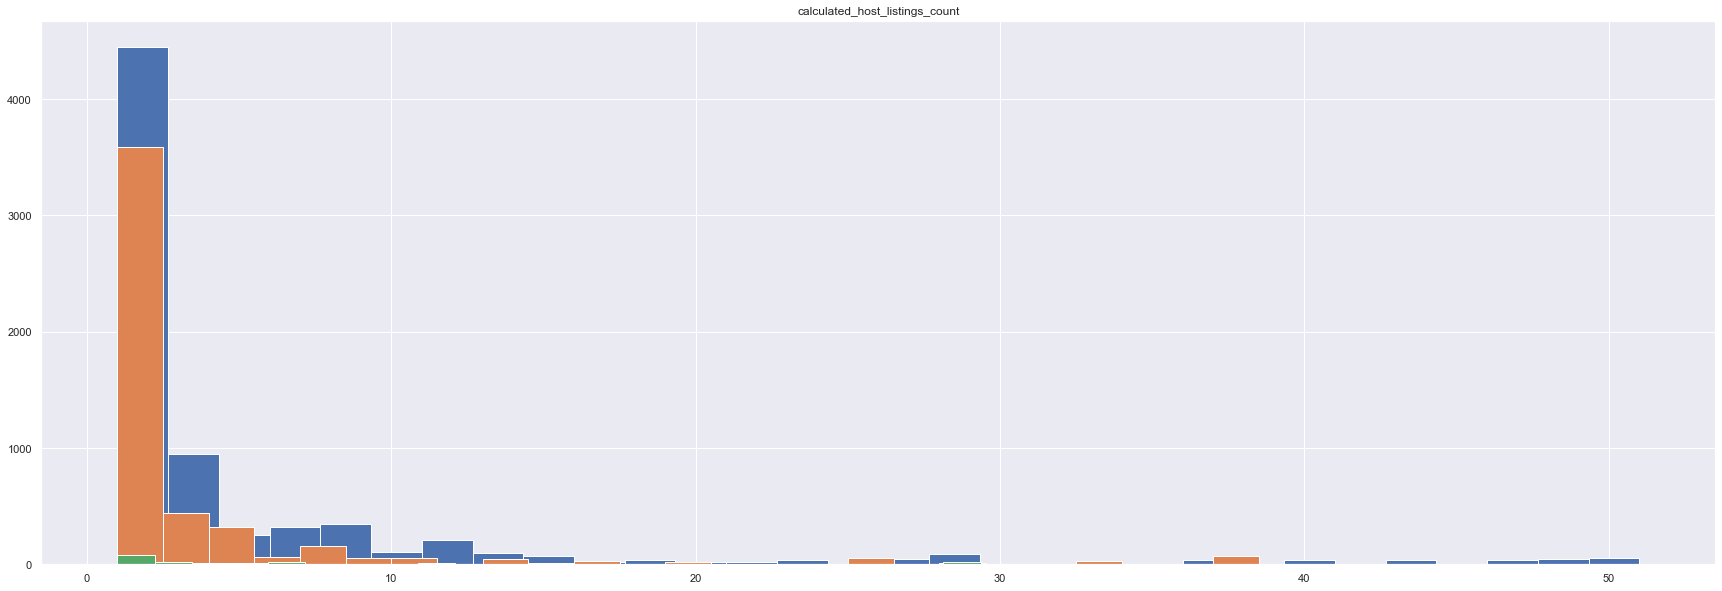

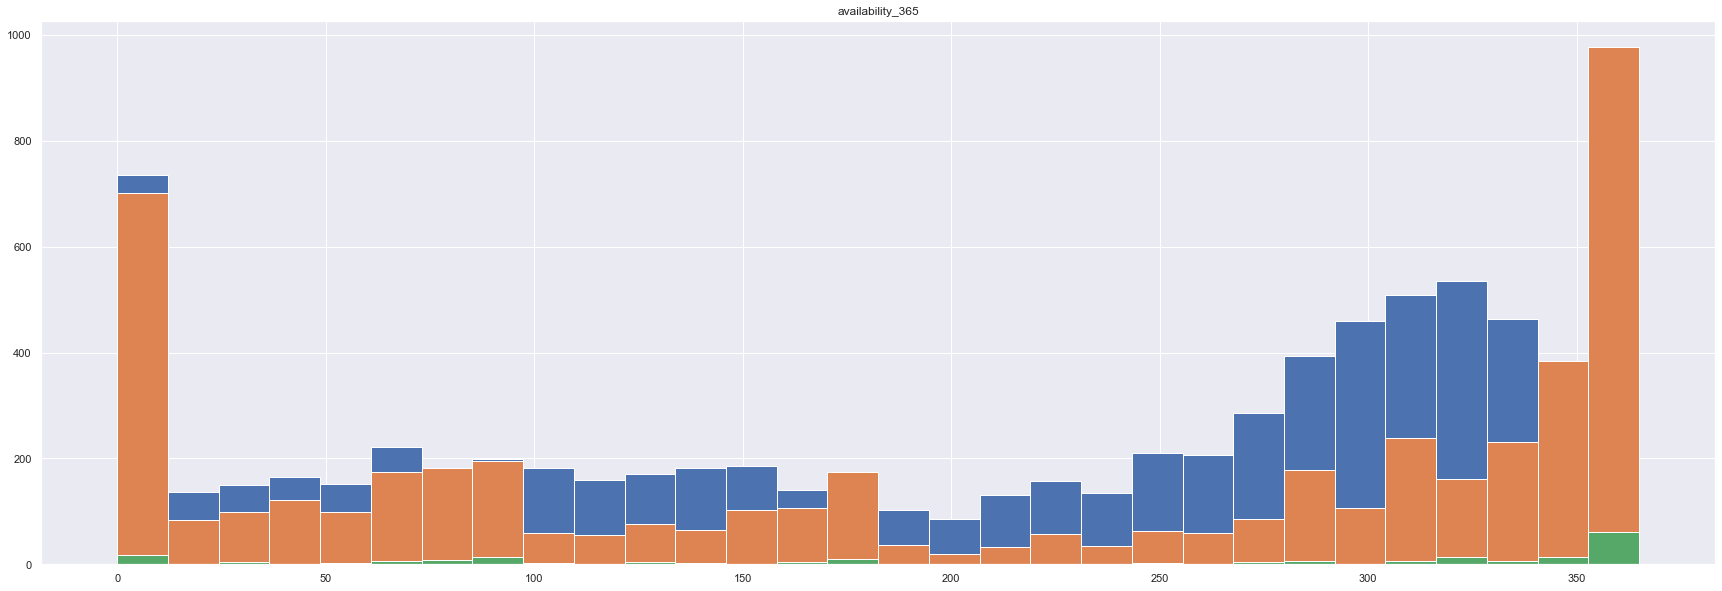

In [26]:
for col in airbnb_cleaned.columns :
    hist_by_room_type(airbnb_cleaned, col)

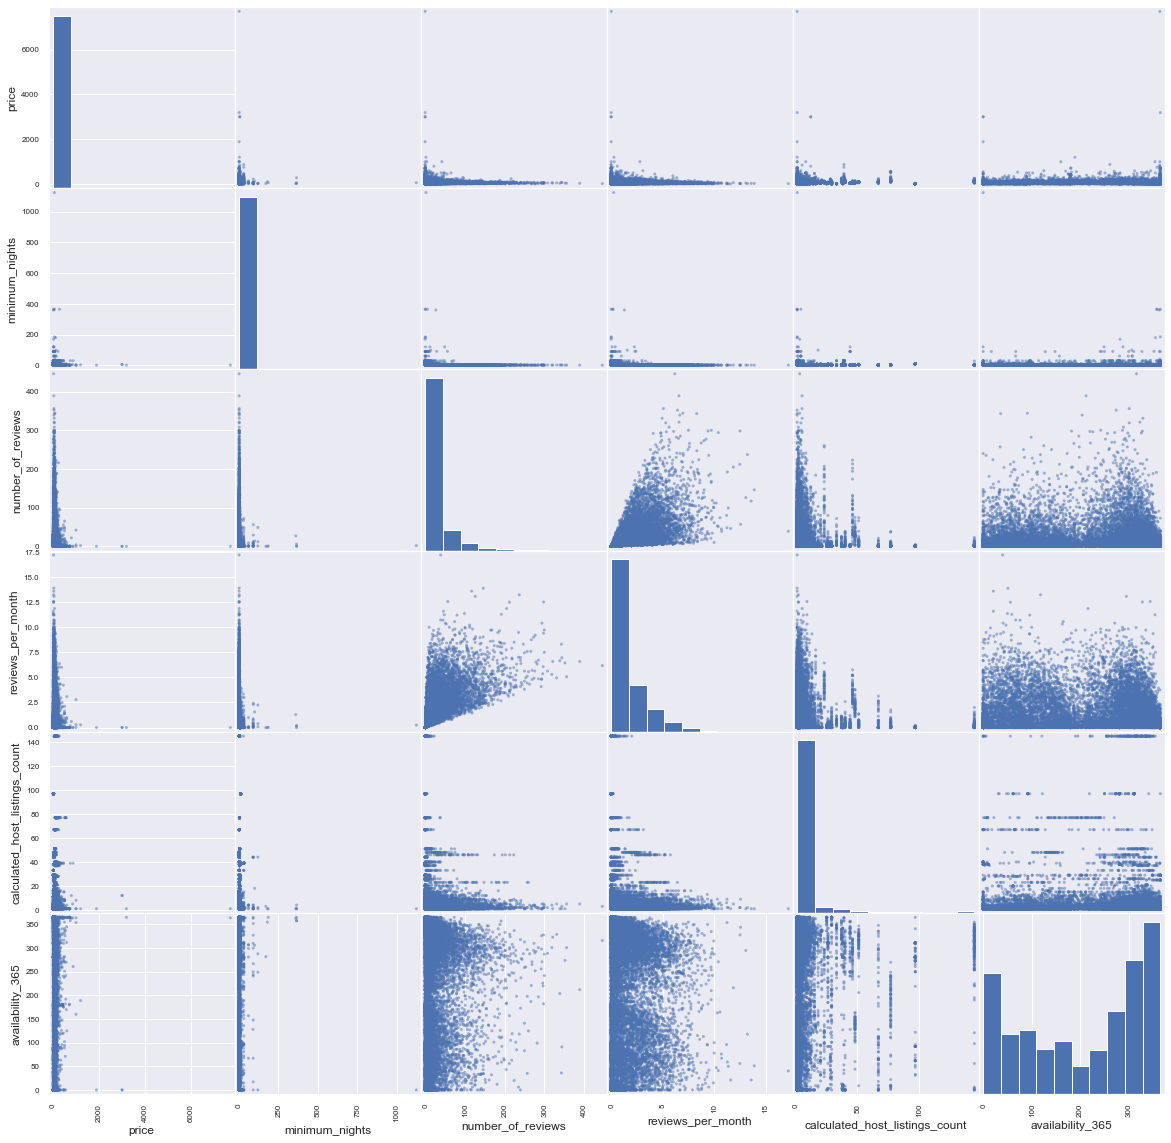

In [27]:
scatter_matrix(num_airbnb.drop(columns=["latitude","longitude"],axis=1,inplace=False), figsize=(20,20))
plt.show()

reviews_per_month y number_of_reviews tienen una relación entre ellas. Cuando una aumenta, aumenta la otra.
number_of_reviews / reviews_per_month = meses publicados.

In [28]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
ordinal_y_train = ordinal_encoder.fit_transform(airbnb[["room_type"]])
ordinal_y_train_df = pd.DataFrame(ordinal_y_train)
ordinal_y_train_df

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
13316,1.0
13317,0.0
13318,0.0
13319,0.0


In [29]:
ordinal_encoder.categories_

[array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)]

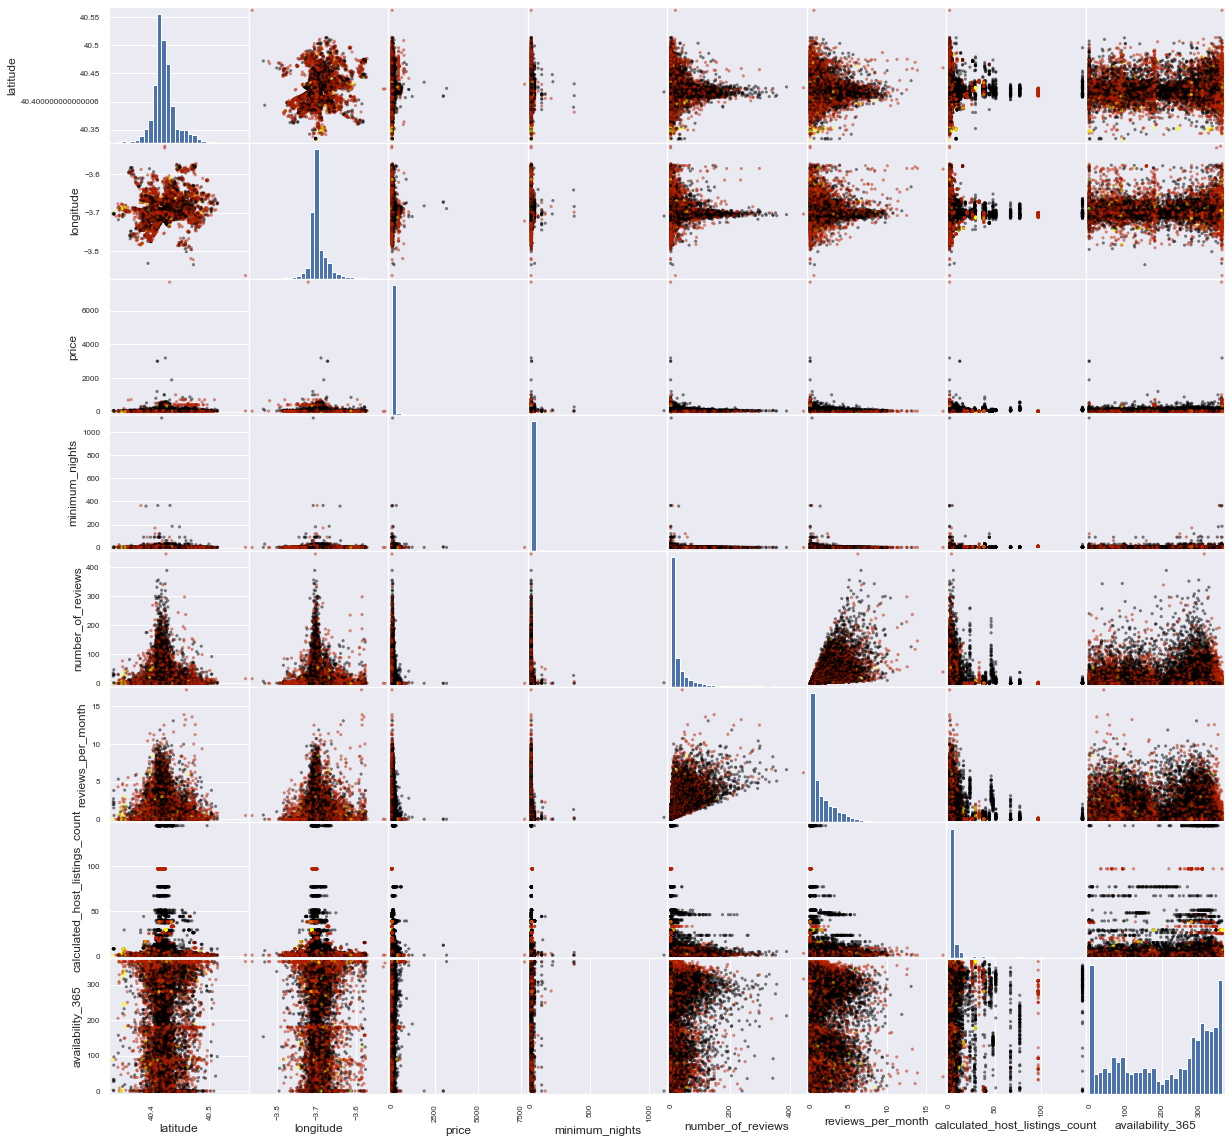

In [30]:
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(num_airbnb, c = ordinal_y_train_df[0], marker = 'o', s=10, hist_kwds={'bins':30}, figsize=(20,20), cmap = cmap)

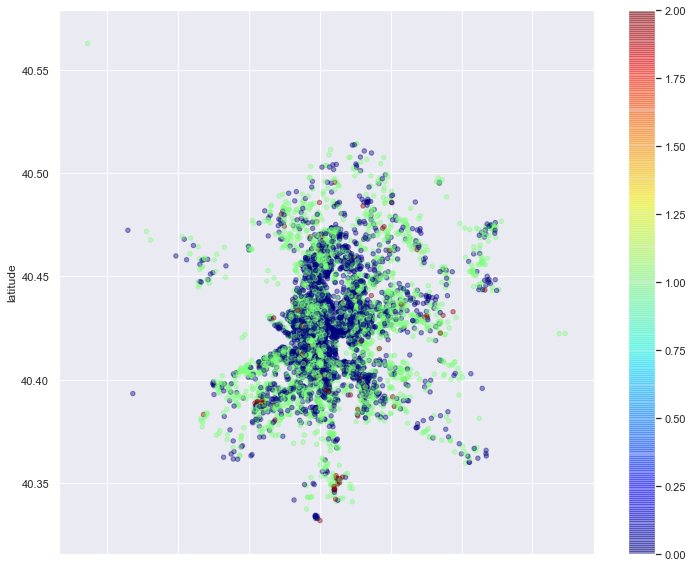

In [31]:
num_airbnb.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(12,10),
             c=ordinal_y_train_df[0], cmap=plt.get_cmap("jet"), colorbar=True
            )

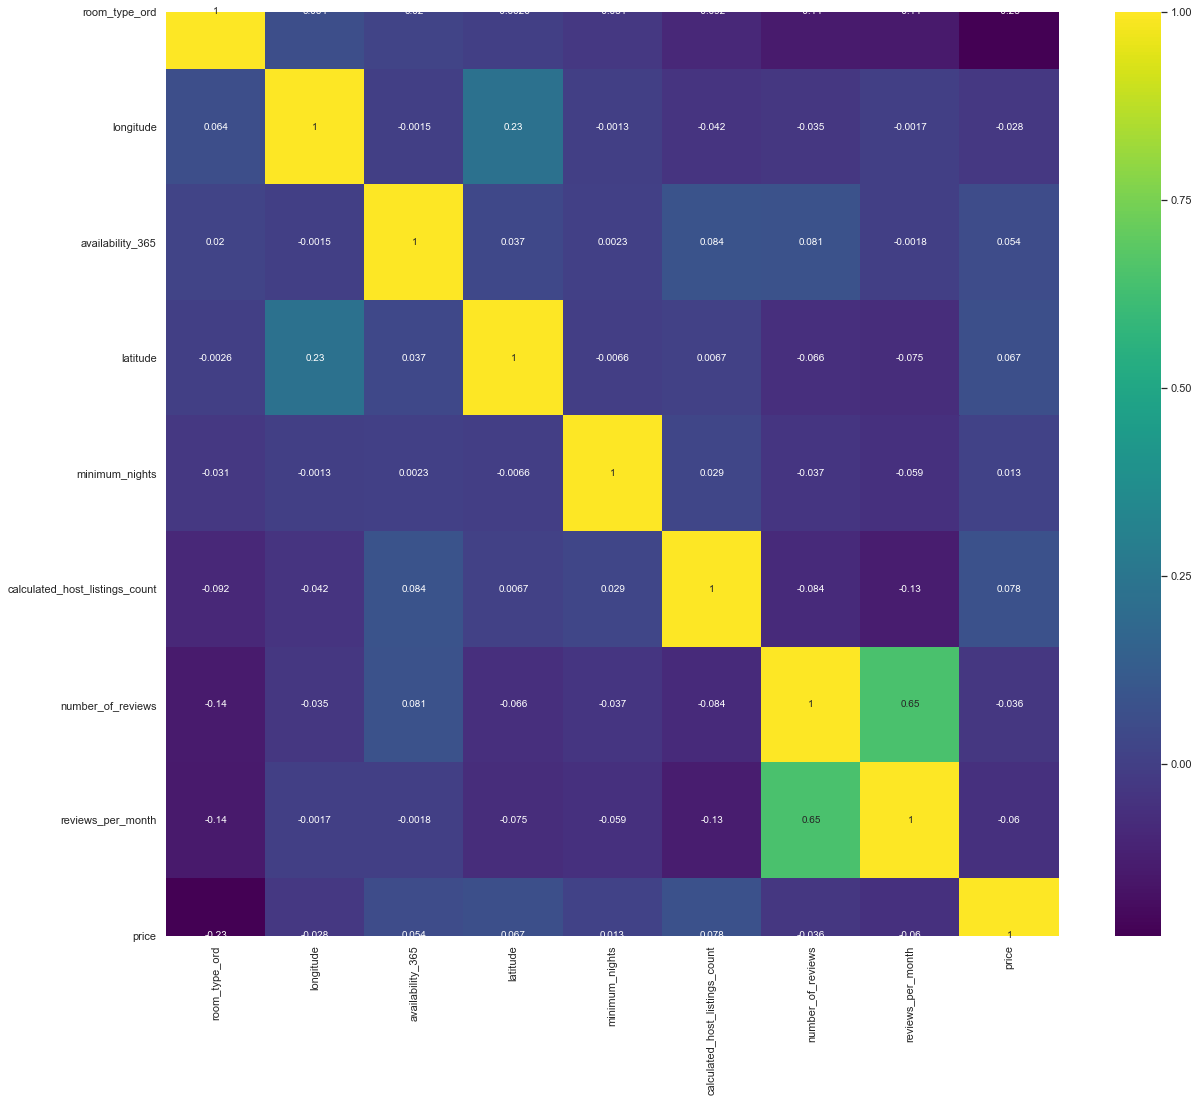

In [32]:
num_airbnb["room_type_ord"] = ordinal_y_train_df[0]
k = 12
cols = num_airbnb.corr().nlargest(12, 'room_type_ord')["room_type_ord"].index
cm = num_airbnb[cols].corr()
plt.figure(figsize=(20,17))
sns.heatmap(cm, annot=True, cmap='viridis')

In [33]:
num_airbnb.drop("neighbourhood",axis=1,inplace=False).groupby("neighbourhood_group").hist()

KeyError: "['neighbourhood'] not found in axis"

In [ ]:
airbnb[airbnb["room_type"] == "Entire home/apt"]["neighbourhood"].value_counts().plot(kind='barh', figsize=(20,17))

In [ ]:
airbnb[airbnb["room_type"] == "Private room"]["neighbourhood"].value_counts().plot(kind='barh', figsize=(20,17))

In [ ]:
airbnb[airbnb["room_type"] == "Shared room"]["neighbourhood"].value_counts().plot(kind='barh', figsize=(20,17))

# Estudio estadistico y limpieza de datos
1) Estudio estadístico de los datos<br/>
2) Contar Nº de registros por categoria de room_type  (Balanceo de clases) <br/>
3) limpieza de datos <br/>
4) Estudio de correlación <br/>

### 1)

In [ ]:
airbnb.head(10)

Comprobamos que los datos se han cargado correctamente y visualizamos nuestros datos por encima:

In [ ]:
airbnb.describe()

In [ ]:
airbnb.info()

In [ ]:
airbnb.hist(bins=50, figsize=(23,15))
plt.show()

# Conclusiones
No existen valores NULL en ninguna de las columnas -> Todas tienen 13321 registros.

neighbourhood_group, neighbourhood y room_type son features categóricas.

Se aprecia que varios atributos son tail-heavy. Tendremos que tratar este tema mas adelante.


# Categorias de label

In [ ]:
airbnb["room_type"].hist()

In [ ]:
airbnb["neighbourhood"].hist(figsize=(20,17), bins=60)

## Creamos test y train set

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Nota, he probado con neighbourhood, pero al tener categorias con menos de 2 valores, no podemos usar esta columna para stratificar. 
# Esto nos deja 2 opciones: 
# 1- Borrar los registros cuya categoría sólo tiene 1 registro. Pero perdemos registros valiosos.
# 2- Usar neighbourhood_group, que agrupa los neighbourhood y no tiene el mismo inconveniente.
for train_indices, test_indices in split.split(airbnb, airbnb["neighbourhood_group"]):
    strat_train_set = airbnb.loc[train_indices]
    strat_test_set = airbnb.loc[test_indices]

In [ ]:
test_path = os.path.join("sets","strat_test_set.csv")
#strat_test_set.to_csv(test_path, index=False)

In [ ]:
train_path = os.path.join("sets","strat_train_set.csv")
#strat_train_set.to_csv(train_path, index=False)

# Correlation matrix

In [ ]:
train_set = pd.read_csv(train_path)
y_train = train_set["room_type"]
#x_train = train_set.drop(["room_type","neighbourhood_group"], axis=1, inplace=False)
x_train = train_set.drop("room_type", axis=1, inplace=False)

In [ ]:
x_train.info()

Primero tenemos que convertir las categorias a numeros. Usaremos OneHotEncoder.

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

label = ["room_type"]
cat_attribs = ["neighbourhood_group","neighbourhood"]
num_attribs = ["latitude","longitude","price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]

full_pipeline = ColumnTransformer([
    ('label', OrdinalEncoder(), label),
    ('num', MinMaxScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [ ]:
train_prep_out = full_pipeline.fit_transform(train_set)

In [ ]:
categories = full_pipeline.named_transformers_.cat.categories_
categories = [*categories[0], *categories[1]]

In [ ]:
train_prep   = pd.DataFrame(train_prep_out.toarray(), columns=[[*label, *num_attribs, *categories]])
x_train_prep = train_prep[[*num_attribs, *categories]]
y_train_prep = train_prep[label]

In [ ]:
y_train_prep

In [ ]:
train_prep

In [ ]:
train_set["room_type"] = ordinal_y_train_df[0]
k = 5
col = train_set.corr().nlargest(n=k, columns="room_type").index
cm = train_set[col].corr()
plt.figure(figsize=(20,14))
sns.heatmap(cm, annot=True, cmap='viridis')

In [ ]:
k = 12
cols = train_prep.corr().nlargest(12, 'room_type')["room_type"].index
cm = train_prep[cols].corr()
plt.figure(figsize=(20,17))
sns.heatmap(cm, annot=True, cmap='viridis')

In [ ]:
corr = train_prep.corr()[["room_type"]]
corr[abs(corr) > 0.1]


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

naive_bayes_model = GaussianNB()

In [ ]:
naive_bayes_scores = cross_val_score(naive_bayes_model, x_train_prep, y_train, cv=10)
naive_bayes_scores

In [ ]:
num_naive_bayes_scores = cross_val_score(naive_bayes_model, x_train_prep[[*num_attribs]], y_train, cv=10)
num_naive_bayes_scores

In [ ]:
cat_naive_bayes_scores = cross_val_score(naive_bayes_model, x_train_prep[[*categories]], y_train, cv=10)
cat_naive_bayes_scores

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k, algorithm="auto")
cross_val_score(knn_model, x_train_prep, y_train, cv=10)

In [ ]:
knn_model.fit(x_train_prep, y_train)
knn_predict = knn_model.predict(x_train_prep)

confusion_matrix(y_train, knn_predict)

# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(max_depth=9, max_leaf_nodes=19, min_samples_split=3, random_state=42, class_weight="balanced")
cross_val_score(dtree_model, x_train_prep, y_train, cv=10)

In [ ]:
dtree_model.fit(x_train_prep, y_train)
dtree_predict = dtree_model.predict(x_train_prep)
confusion_matrix(y_train, dtree_predict)

In [ ]:
test_set = pd.read_csv(test_path)
test_set_prep = full_pipeline.fit_transform(test_set)
test_set_prep = pd.DataFrame(test_set_prep.toarray(), columns=[[*label, *num_attribs, *categories]])

In [ ]:
test_predict = dtree_model.predict(test_set_prep)